This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    # Create a simple model
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 0.6097 - accuracy: 0.8142 - val_loss: 0.4290 - val_accuracy: 0.8513
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2553 - accuracy: 0.9219 - val_loss: 0.2426 - val_accuracy: 0.9229
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1676 - accuracy: 0.9491 - val_loss: 0.1667 - val_accuracy: 0.9471
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1192 - accuracy: 0.9630 - val_loss: 0.1678 - val_accuracy: 0.9502
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0886 - accuracy: 0.9722 - val_loss: 0.1230 - val_accuracy: 0.9649
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0628 - accuracy: 0.9799 - val_loss: 0.1165 - val_accuracy: 0.9685
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0462 - accuracy: 0.9851 - val_loss: 0.1349 - val_accuracy: 0.9631
Epoch 

**Plotting a validation accuracy comparison**

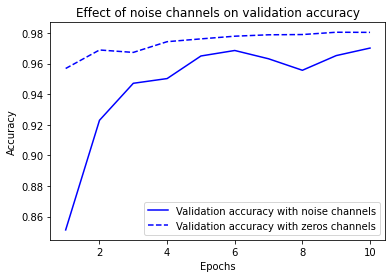

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
# 在深度学习中，画图对比不同方案的差异很重要

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 2.3160 - accuracy: 0.1018 - val_loss: 2.3069 - val_accuracy: 0.1058
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2995 - accuracy: 0.1181 - val_loss: 2.3122 - val_accuracy: 0.1035
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2911 - accuracy: 0.1264 - val_loss: 2.3251 - val_accuracy: 0.1057
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2794 - accuracy: 0.1401 - val_loss: 2.3212 - val_accuracy: 0.1067
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2639 - accuracy: 0.1525 - val_loss: 2.3405 - val_accuracy: 0.1039
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2449 - accuracy: 0.1674 - val_loss: 2.3527 - val_accuracy: 0.0995
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2217 - accuracy: 0.1796 - val_loss: 2.3669 - val_accuracy: 0.1018

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [10]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), # 学习率为 1.0
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 6ms/step - loss: 478.0742 - accuracy: 0.2690 - val_loss: 2.3550 - val_accuracy: 0.1638
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 2.4967 - accuracy: 0.1526 - val_loss: 2.6023 - val_accuracy: 0.1061
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 2.5026 - accuracy: 0.1489 - val_loss: 2.4925 - val_accuracy: 0.1797
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 2.3858 - accuracy: 0.1608 - val_loss: 2.1698 - val_accuracy: 0.1717
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 2.4035 - accuracy: 0.1662 - val_loss: 2.3924 - val_accuracy: 0.1922
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 2.3999 - accuracy: 0.1785 - val_loss: 2.4515 - val_accuracy: 0.1860
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 2.4773 - accuracy: 0.1860 - val_loss: 2.1937 - val_accuracy: 0.1928
Epoc

**The same model with a more appropriate learning rate**

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), # 学习率为 0.01
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.3521 - accuracy: 0.9104 - val_loss: 0.1409 - val_accuracy: 0.9625
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1256 - accuracy: 0.9653 - val_loss: 0.1547 - val_accuracy: 0.9604
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0987 - accuracy: 0.9736 - val_loss: 0.1520 - val_accuracy: 0.9653
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0835 - accuracy: 0.9791 - val_loss: 0.1511 - val_accuracy: 0.9691
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0725 - accuracy: 0.9825 - val_loss: 0.2262 - val_accuracy: 0.9627
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0674 - accuracy: 0.9846 - val_loss: 0.2053 - val_accuracy: 0.9672
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0540 - accuracy: 0.9870 - val_loss: 0.2005 - val_accuracy: 0.9721
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6700 - accuracy: 0.8326 - val_loss: 0.3615 - val_accuracy: 0.9033
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.3551 - accuracy: 0.9024 - val_loss: 0.3089 - val_accuracy: 0.9131
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.3185 - accuracy: 0.9110 - val_loss: 0.2938 - val_accuracy: 0.9180
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.3020 - accuracy: 0.9158 - val_loss: 0.2825 - val_accuracy: 0.9209
Epoch 5/20
375/375 [==============================] - 0s 1ms/step - loss: 0.2924 - accuracy: 0.9187 - val_loss: 0.2784 - val_accuracy: 0.9232
Epoch 6/20
375/375 [==============================] - 0s 1ms/step - loss: 0.2859 - accuracy: 0.9196 - val_loss: 0.2744 - val_accuracy: 0.9243
Epoch 7/20
375/375 [==============================] - 0s 1ms/step - loss: 0.2807 - accuracy: 0.9218 - val_loss: 0.2713 - val_accuracy: 0.9265
Epoch 

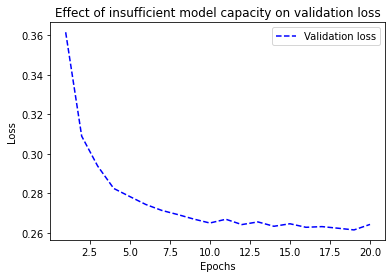

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [14]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3733 - accuracy: 0.8943 - val_loss: 0.1825 - val_accuracy: 0.9490
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1704 - accuracy: 0.9506 - val_loss: 0.1481 - val_accuracy: 0.9551
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1235 - accuracy: 0.9637 - val_loss: 0.1242 - val_accuracy: 0.9622
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0940 - accuracy: 0.9722 - val_loss: 0.1115 - val_accuracy: 0.9676
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0755 - accuracy: 0.9770 - val_loss: 0.0992 - val_accuracy: 0.9689
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0611 - accuracy: 0.9809 - val_loss: 0.0929 - val_accuracy: 0.9719
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0506 - accuracy: 0.9848 - val_loss: 0.0940 - val_accuracy: 0.9718
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [15]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5391 - accuracy: 0.7561 - val_loss: 0.4062 - val_accuracy: 0.8677
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3246 - accuracy: 0.8963 - val_loss: 0.3080 - val_accuracy: 0.8875
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2401 - accuracy: 0.9194 - val_loss: 0.2872 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1935 - accuracy: 0.9368 - val_loss: 0.3058 - val_accuracy: 0.8766
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1617 - accuracy: 0.9462 - val_loss: 0.2811 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1386 - accuracy: 0.9552 - val_loss: 0.3036 - val_accuracy: 0.8818
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1159 - accuracy: 0.9643 - val_loss: 0.3046 - val_accuracy: 0.8849
Epoch 8/20
30

**Version of the model with lower capacity**

In [16]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6459 - accuracy: 0.7031 - val_loss: 0.5992 - val_accuracy: 0.7725
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5542 - accuracy: 0.8371 - val_loss: 0.5216 - val_accuracy: 0.8603
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4708 - accuracy: 0.8801 - val_loss: 0.4509 - val_accuracy: 0.8714
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3995 - accuracy: 0.8949 - val_loss: 0.3971 - val_accuracy: 0.8750
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3426 - accuracy: 0.9053 - val_loss: 0.3568 - val_accuracy: 0.8811
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2977 - accuracy: 0.9135 - val_loss: 0.3258 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2625 - accuracy: 0.9216 - val_loss: 0.3065 - val_accuracy: 0.8849
Epoch 8/20
30

**Version of the model with higher capacity**

In [17]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 93ms/step - loss: 0.5901 - accuracy: 0.7088 - val_loss: 0.3671 - val_accuracy: 0.8595
Epoch 2/20
30/30 [==============================] - 2s 84ms/step - loss: 0.3256 - accuracy: 0.8689 - val_loss: 0.4409 - val_accuracy: 0.8057
Epoch 3/20
30/30 [==============================] - 2s 83ms/step - loss: 0.2502 - accuracy: 0.9006 - val_loss: 0.2864 - val_accuracy: 0.8796
Epoch 4/20
30/30 [==============================] - 2s 83ms/step - loss: 0.1825 - accuracy: 0.9287 - val_loss: 0.3208 - val_accuracy: 0.8727
Epoch 5/20
30/30 [==============================] - 2s 81ms/step - loss: 0.1542 - accuracy: 0.9395 - val_loss: 0.2815 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 2s 81ms/step - loss: 0.1044 - accuracy: 0.9636 - val_loss: 0.3234 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 2s 81ms/step - loss: 0.0870 - accuracy: 0.9702 - val_loss: 0.3556 - val_accuracy: 0.8851
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [18]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002), # L2 正则化
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.6374 - accuracy: 0.7643 - val_loss: 0.5038 - val_accuracy: 0.8666
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4352 - accuracy: 0.8880 - val_loss: 0.4109 - val_accuracy: 0.8800
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3525 - accuracy: 0.9100 - val_loss: 0.3931 - val_accuracy: 0.8733
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3163 - accuracy: 0.9186 - val_loss: 0.3607 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2895 - accuracy: 0.9287 - val_loss: 0.3585 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2703 - accuracy: 0.9352 - val_loss: 0.4005 - val_accuracy: 0.8670
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2646 - accuracy: 0.9361 - val_loss: 0.3618 - val_accuracy: 0.8848
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [19]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [20]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.6510 - accuracy: 0.6283 - val_loss: 0.5768 - val_accuracy: 0.6701
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5538 - accuracy: 0.7810 - val_loss: 0.5015 - val_accuracy: 0.8252
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4924 - accuracy: 0.8496 - val_loss: 0.4609 - val_accuracy: 0.8713
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.4444 - accuracy: 0.8868 - val_loss: 0.4372 - val_accuracy: 0.8612
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4023 - accuracy: 0.9022 - val_loss: 0.4100 - val_accuracy: 0.8825
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3674 - accuracy: 0.9187 - val_loss: 0.4024 - val_accuracy: 0.8781
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3391 - accuracy: 0.9268 - val_loss: 0.4079 - val_accuracy: 0.8748
Epoch 8/20
30

## Summary